In [25]:
#importing all the required components

import tkinter as tk
from tkinter.ttk import *
from tkinter import messagebox
import csv
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [26]:
li = []
node_details = {}

with open("amazonupd.csv") as file:
    data = csv.reader(file)
    next(data)
    for row in data:
        li.append([int(row[0]), float(row[1]), str(row[2])])
        if str(row[3]) not in node_details:
            node_details[str(row[2])] = [float(row[3])//1, float(row[4]), float(row[3])//1]
        
edges = []
with open("amazoncon.csv") as file:
    data = csv.reader(file)
    next(data)
    for row in data:
        edges.append([row[0], row[1]])

In [27]:
def forwardGraph():
    for each in node_details.keys():
        node_details[each][0] *= node_details[each][1]
    print(node_details)
    showTheUpdGraph()

In [28]:
def editGraph():
    try:
        count_red = int(sred.get())
        spname = editSpecies.get()
    except:
        tk.messagebox.showinfo("Error","Check input!")
    else:
        if spname == "None":
            tkinter.messagebox.showinfo("Error","Check input!")
            return
    
        node_details[spname][2] -= count_red
        
        tk.messagebox.showinfo("Alert","Are You Sure")
        
        if node_details[spname][2] <= 0:
            str1 = ""
            liprey = [each[0] for each in edges if each[1]==spname]
            if len(liprey)<1:
                str1 = "None"
            else:
                for each in liprey:
                    str1 += each+", "
                str1.rstrip(" ")
            str2 = ""
            lipred = [each[1] for each in edges if each[0]==spname]
            if len(lipred)<1:
                str2 = "None"
            else:
                for each in lipred:
                    str2 += each+", "
                str2.rstrip(" ")
            tk.messagebox.showinfo("Alert","Species "+str(spname)+" is depleted. Effected Preys are:\n"+str1+"\n\nEffected Predators are\n"+str2)
            
            for i in edges:
                if spname in i:
                    edges.remove(i)
            
            for i in edges:
                if spname in i:
                    edges.remove(i)

In [30]:
def showTheUpdGraph():
    X = nx.DiGraph()
    for each in li:
        X.add_node(each[2], pos = [float(each[0]), float(each[1])], size=node_details[each[2]][0]//10)

    X.add_edges_from(edges)
    pos = nx.get_node_attributes(X,'pos')

    col_list = ['lightgreen','pink','cyan', 'lightblue','orange','yellow','aquamarine', 'cornflowerblue','slategray']
    plt.figure(3,figsize=(30, 30)) 
    nx.draw_networkx_nodes(X, pos, node_size=[node_details[each][0]//20 for each in node_details.keys()], node_color=[col_list[int(pos[each][1])] for each in pos.keys()])
    nx.draw_networkx_edges(X, pos, arrowstyle='->', arrowsize = 15)
    nx.draw_networkx_labels(X, pos, font_size=8, font_family='sans-serif')
    plt.grid(True, which='both')
    plt.ylabel('Trophic Level')
    plt.axis('on')
    plt.show()


def showTheGraph():
    X = nx.DiGraph()
    for each in li:
        X.add_node(each[2], pos = [float(each[0]), float(each[1])], size=node_details[each[2]][0]//10)

    X.add_edges_from(edges)
    pos = nx.get_node_attributes(X,'pos')

    col_list = ['lightgreen','pink','cyan', 'lightblue','orange','yellow','aquamarine', 'cornflowerblue','slategray']
    plt.figure(3,figsize=(30, 30)) 
    nx.draw_networkx_nodes(X, pos, node_size=[node_details[each][2]//20 for each in node_details.keys()], node_color=[col_list[int(pos[each][1])] for each in pos.keys()])
    nx.draw_networkx_edges(X, pos, arrowstyle='->', arrowsize = 15)
    nx.draw_networkx_labels(X, pos, font_size=8, font_family='sans-serif')
    plt.grid(True, which='both')
    plt.ylabel('Trophic Level')
    plt.axis('on')
    plt.show()

In [31]:
def insert_in_graph(sname, snum, sgrowth, strophic, food1, food2, food3):
    for each in li:
        if sname in each:
            tkinter.messagebox.showinfo("Error","Species already exists!")
            return
        
    x = 0
    for each in li:
        if float(each[1]) == float(strophic):
            x = each[0]
    x += 10
    
    li.append((x, strophic, sname))
    
    if food1 != "None":
        edges.append((food1, sname))
    if food2 != "None":
        edges.append((food1, sname))
    if food3 != "None":
        edges.append((food1, sname))
        
    node_details[sname] = [float(snum)//1, float(sgrowth), float(snum)//1]
    
    tk.messagebox.showinfo("Alert","Are You Sure")

In [32]:
def onClick():
    try:
        species_name = sname.get()
        species_num = int(snum.get())
        species_growth = float(sgrowth.get())
        species_trophic = float(strophic.get())
    except:
        tk.messagebox.showinfo("Error","Check input!")
    else:
        insert_in_graph(sname.get(), snum.get(), sgrowth.get(), strophic.get(), food1.get(), food2.get(), food3.get())

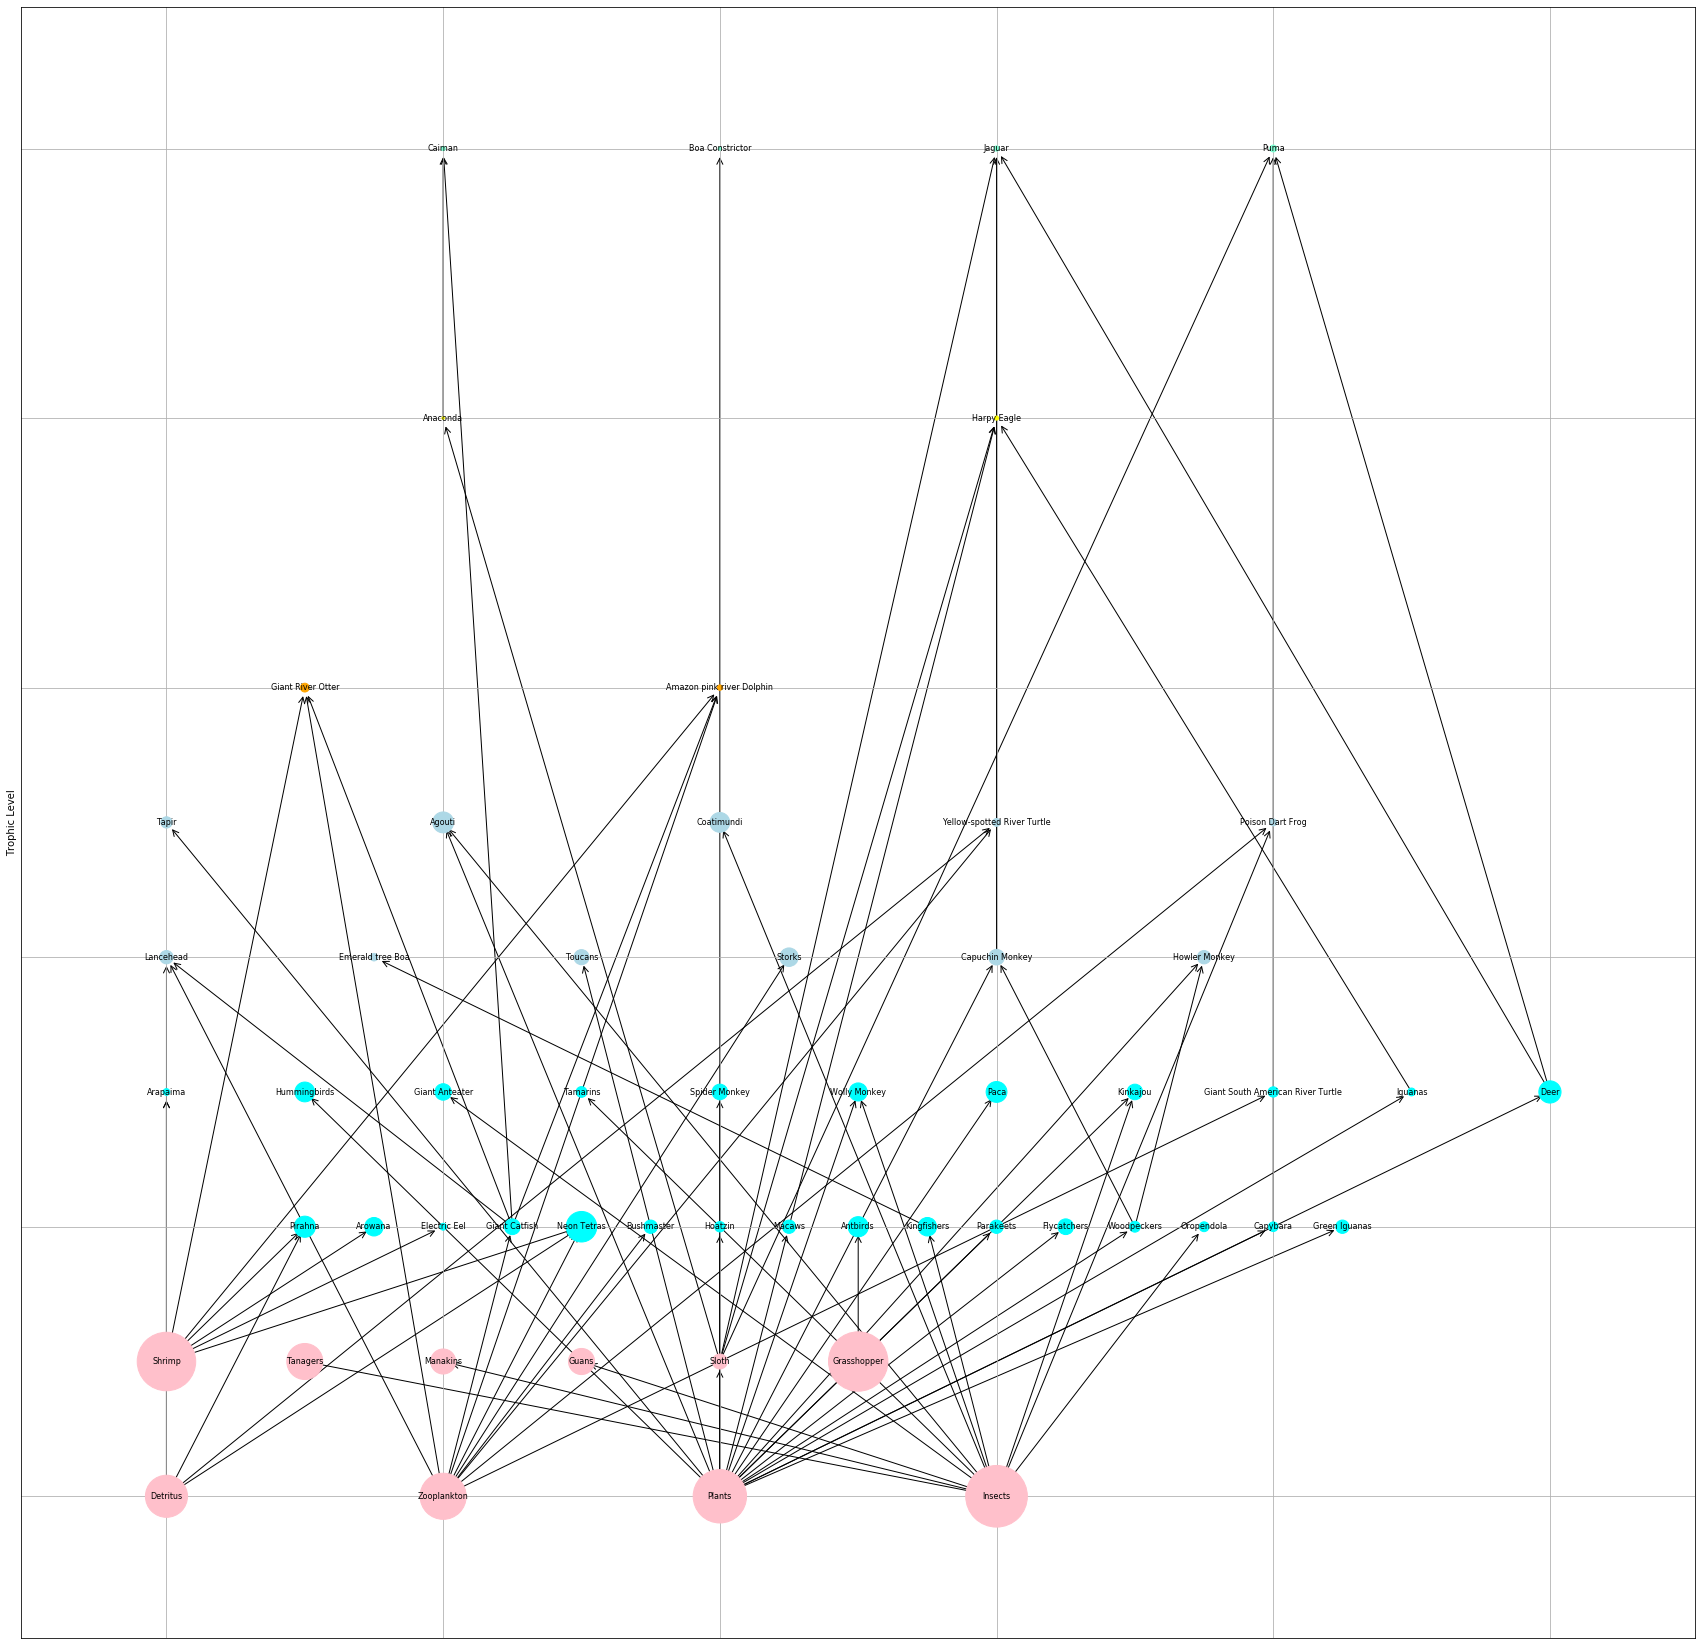

In [33]:
root = tk.Tk()
root.title("Food Web")
root.geometry("1080x300")

tk.Label(root, text = "Food Web", font = "Bold 14").place(relx = 0.5, y = 0)

tkvar = tk.StringVar(root)

tk.Label(root, text = "Species Name: ", font = "Bold, 10").place(x = 0, y = 60)
sname = tk.StringVar()
e = tk.Entry(root, textvariable=sname)
e.place(x = 100, y = 60)

tk.Label(root, text = "Count:", font = "Bold, 10").place(x = 250, y = 60)
snum = tk.StringVar()
e1 = tk.Entry(root, textvariable=snum)
e1.place(x = 300, y = 60)

tk.Label(root, text = "Growth rate:", font = "Bold, 10").place(x = 450, y = 60)
sgrowth = tk.StringVar()
e2 = tk.Entry(root, textvariable=sgrowth)
e2.place(x = 550, y = 60)

tk.Label(root, text = "Trophic Level:", font = "Bold, 10").place(x = 700, y = 60)
strophic = tk.StringVar()
e3 = tk.Entry(root, textvariable=strophic)
e3.place(x = 800, y = 60)

tk.Label(root, text = "Eats:", font = "Bold, 10").place(x = 100, y = 90)

choices = [each[2] for each in li]
choices.sort()
choices.insert(0, "None")

food1 = tk.StringVar(root)
food1.set("None")
popupMenu = Combobox(root, textvariable=food1, values=choices)
tk.Label(root, text = "Add Species", font = "Bold, 10").place(x = 0, y = 30)
popupMenu.place(x = 150, y = 90)
tk.Scrollbar(popupMenu, orient="vertical")

food2 = tk.StringVar(root)
food2.set("None")
popupMenu2 = Combobox(root, textvariable=food2, values=choices)
popupMenu2.place(x = 300, y = 90)
tk.Scrollbar(popupMenu, orient="vertical")

food3 = tk.StringVar(root)
food3.set("None")
popupMenu3 = Combobox(root, textvariable=food3, values=choices)
popupMenu3.place(x = 450, y = 90)
tk.Scrollbar(popupMenu, orient="vertical")        
    
button = tk.Button(root,text = "Add Species", command = onClick)
button.place(x=150, y=120)

tk.Label(root, text = "Forest Fires:", font = "Bold, 10").place(x = 0, y = 150)
editSpecies = tk.StringVar(root)
editSpecies.set("None")
popupMenu2 = Combobox(root, textvariable=editSpecies, values=choices)
popupMenu2.place(x = 100, y = 150)
tk.Scrollbar(popupMenu, orient="vertical")
tk.Label(root, text = "Death Count:", font = "Bold, 10").place(x = 275, y = 150)
sred = tk.StringVar()
e3 = tk.Entry(root, textvariable=sred)
e3.place(x = 375, y = 150)
button = tk.Button(root,text = "Add Accident", command = editGraph)
button.place(x=100, y=180)


tk.Label(root, text = "Graph Represent:", font = "Bold, 10").place(x = 0, y = 220)
button = tk.Button(root,text = "Print Graph", command = showTheGraph)
button.place(x=150, y=220)

tk.Label(root, text = "Forward 1 year:", font = "Bold, 10").place(x = 0, y = 250)
button = tk.Button(root,text = "Print Graph", command = forwardGraph)
button.place(x=150, y=250)

root.mainloop()